# Processamento de Imagens Digitais 
## Dept. de Estatística, Mat. Aplicada e Computação (DEMAC)
#### Prof. Daniel Carlos Guimarães Pedronette

# Relatório da lista de exercícios N° 1
-------------------------------
**Nome:** Álvaro Leandro Cavalcante Carneiro 


**Linguagem utilizada:** Python 3.6



## Importando as bibliotecas 
Importando as bibliotecas que serão utilizadas para desenvolver as atividades.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data
from PIL import Image
import math 

## Carregamento das imagens
As imagens utilizadas serão carregadas da biblioteca *SkImage* [https://scikit-image.org/docs/dev/api/skimage.data.html], assim como as outras listas de exercícios, porém a imagem escolhida foi a da xícara de café

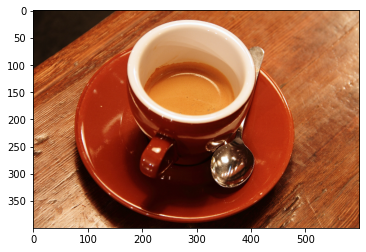

In [16]:
image = data.coffee()
plt.imshow(image, cmap='gray')

## Conversão para escala de cinza
Para fins de simplicidade as imagens serão manipuladas em escala de cinza, por isso é preciso convertê-las a partir do RGB. Isso foi feito utilizando o mesmo método do exercício anterior

In [17]:
def convert_to_gray(image, luma=False):
    if luma:
        params = [0.299, 0.589, 0.114]
    else:
        params = [0.2125, 0.7154, 0.0721]

    gray_image = np.ceil(np.dot(image[...,:3], params))
    # impedir que os valores passem de 255
    gray_image[gray_image > 255] = 255
    
    return gray_image

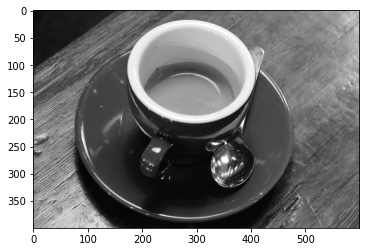

In [18]:
image = convert_to_gray(image)
plt.imshow(image, cmap='gray')

## Binarização
O método *binarize_img* foi criado para performar a binarização da mesma. Para tal, a imagem e o threshold desejados são passados para o método que por sua vez transforma todos os pixels com valor de intensidade maior que o threshold em 1 e menores em 0.

In [8]:
def binarize_img(image, threshold):
    image[image < threshold] = 0
    image[image >= threshold] = 1
    return image

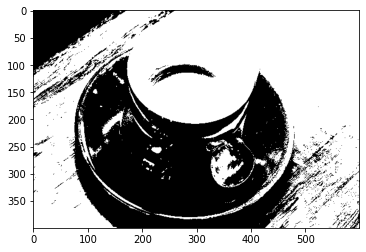

In [10]:
bin_image = binarize_img(image.copy(), 80)
plt.imshow(bin_image, vmin=0, vmax=1, cmap='gray')

Como é possível observar, a aplicação dessa técnica gera um realce instantâneo nas áreas mais claras da imagem, deixando seu valor banco em relação aos demais pontos pretos.


A cópia da imagem é passada como parâmetro para garantir a criação e modificação dos valores de uma nova instância na memória. Além disso, uma pequena modificação é realizada na função de exibir a imagem para indicar que se trata de uma imagem binária.

## Transforção de potência
A transformação de potência foi a próxima aplicada na imagem em escala de cinza, percorrendo cada um dos pixels e elevando seu respectivo valor a uma parâmetro chamado *gamma*, como mostrado no livro de Gonzalez. 

Também foi criado o método *normalize_img* para normalizar os valores da imagem entre 0 e 1 e levá-los novamente ao domínio entre [0, 255].

In [43]:
def normalize_img(img):
    img /= np.max(img)
    img = np.ceil(img * 255)  
    return img

In [44]:
def potential_trans(img, gamma):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = img[row][column] ** gamma
            
    return normalize_img(img)

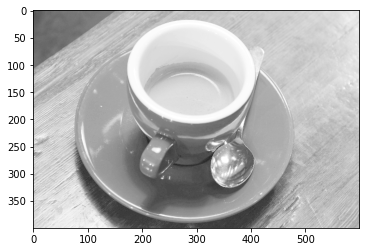

In [45]:
pot_image = potential_trans(image.copy(), 0.2) # gamma fracionário pequeno
plt.imshow(pot_image, cmap='gray')

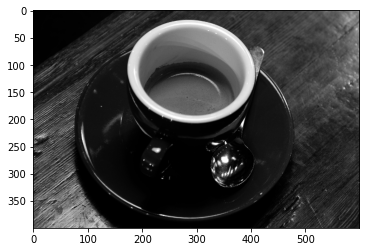

In [46]:
pot_image = potential_trans(image.copy(), 2) # gamma quadrático
plt.imshow(pot_image, cmap='gray')

Assim como mostrado por Gonzalez, utilizar um gama fracionário (<1) tende a aumentar o brilho na imagem, pois os valores dos pixels ficam mais aproximados, enquanto utilizar valores maiores de gamma diminuem o brilho da imagem devido à diferença acentuada entre os pixels causados pela potência, aumentando muito os valores de intensidade maiores em relação aos menores. 

## Transformação logarítimica
Para a transformação logarítimica foi criado o método *log_trans*, passando a imagem e uma base como parâmetro para ser usado no *log*. A lógica de percorrimento da imagem para transformação dos valores de intensidade e também a normalização dos mesmo segue igual ao método anterior.

In [47]:
def log_trans(img, base):
    for row in range(img.shape[0]):
        for column in range(image.shape[1]):
            img[row][column] = math.log(img[row][column], base)
            
    return normalize_img(img)

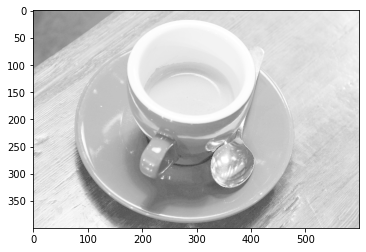

In [51]:
log_image = log_trans(image.copy(), 2)
plt.imshow(log_image, cmap='gray')

A função logarítimica tende a aumentar o brilho da imagem como mostrado

## Função exponencial


In [52]:
def exponential_trans(img):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = np.exp(img[row][column])
            
    return normalize_img(img)

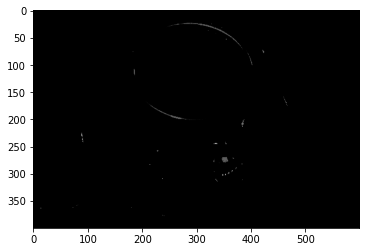

In [54]:
exp_image = exponential_trans(image.copy())
plt.imshow(exp_image, cmap='gray')

## Raiz quadrada

In [58]:
def sqrt_trans(img):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = math.sqrt(img[row][column])
            
    return normalize_img(img)

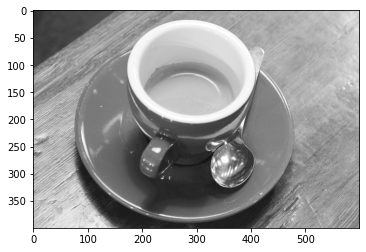

In [59]:
sqrt_image = sqrt_trans(image.copy())
plt.imshow(sqrt_image, cmap='gray')